In [2]:
#!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/101/397/original/Sachin_ODI.csv -P ../data

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(precision = True , suppress = True)

In [31]:
sachin = pd.read_csv('../data/Sachin_ODI.csv')
sachin.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [32]:
sachin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runs     360 non-null    int64  
 1   NotOut   360 non-null    int64  
 2   mins     360 non-null    object 
 3   bf       360 non-null    int64  
 4   fours    360 non-null    int64  
 5   sixes    360 non-null    int64  
 6   sr       360 non-null    float64
 7   Inns     360 non-null    int64  
 8   Opp      360 non-null    object 
 9   Ground   360 non-null    object 
 10  Date     360 non-null    object 
 11  Winner   360 non-null    object 
 12  Won      360 non-null    bool   
 13  century  360 non-null    bool   
dtypes: bool(2), float64(1), int64(6), object(5)
memory usage: 34.6+ KB


In [33]:
runs = sachin['runs']
runs , counts = np.unique(runs , return_counts=True)
rundict = {run : count for run , count in zip(runs , counts)}
print(rundict , '\n', len(rundict))

{0: 14, 1: 15, 2: 16, 3: 8, 4: 10, 5: 8, 6: 8, 7: 9, 8: 9, 9: 4, 10: 4, 11: 6, 12: 5, 13: 3, 14: 6, 15: 3, 16: 4, 17: 6, 18: 7, 19: 3, 20: 2, 21: 4, 22: 1, 23: 2, 24: 1, 25: 3, 26: 1, 27: 6, 28: 6, 29: 3, 30: 4, 31: 2, 32: 5, 33: 1, 34: 1, 35: 4, 36: 3, 37: 4, 38: 4, 39: 6, 40: 4, 41: 4, 42: 1, 43: 2, 44: 4, 45: 5, 46: 1, 47: 3, 48: 3, 49: 1, 50: 2, 51: 1, 52: 2, 53: 3, 54: 2, 55: 2, 57: 2, 60: 1, 61: 2, 62: 3, 63: 2, 64: 1, 65: 6, 67: 3, 68: 2, 69: 2, 70: 2, 71: 1, 72: 1, 74: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 2, 82: 2, 83: 1, 85: 2, 86: 1, 87: 1, 88: 1, 89: 2, 90: 1, 91: 2, 93: 5, 94: 1, 95: 2, 96: 1, 97: 2, 98: 1, 99: 3, 100: 6, 101: 2, 102: 1, 104: 1, 105: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 2, 117: 2, 118: 2, 120: 2, 122: 2, 123: 1, 124: 1, 127: 2, 128: 1, 134: 1, 137: 1, 138: 1, 139: 1, 140: 1, 141: 3, 143: 1, 146: 2, 152: 1, 163: 1, 175: 1, 186: 1, 200: 1} 
 122


In [41]:
#Intersection event -> Scored > 50 and India Won.

a = sachin[sachin['runs'] > 50]
b = sachin[sachin['Won'] == True]

intersection = pd.merge(a , b , how = 'inner')
pintersection = len(intersection) / len(sachin)
pintersection

0.20277777777777778

In [52]:
#finding probability using filtering:
fd = sachin[(sachin['runs'] > 50)&(sachin['Won'] == True)]
len(fd)/len(sachin)

0.20277777777777778

In [42]:
# Union event -> score > 50 or India won.

union = pd.concat([a , b]).drop_duplicates()
len(union) / len(sachin)

0.6388888888888888

In [50]:
#conditional probability -> p(India won | scored > 50)
condition = sachin[sachin['runs'] > 50]
c = condition[condition['Won'] == True]
# p(b | a)
pbga = len(c)/len(a)
pbga

0.6134453781512605

In [49]:
#multiplication rule p(a and b) = p(a | b) * p(b)
pbga * (len(a) / len(sachin))

0.20277777777777778

In [56]:
#prob of scoring a century given scored > 50
condition = sachin[sachin['runs'] > 50]
cga = condition[condition['century'] == True]
len(cga) / len(condition)

0.3865546218487395

In [57]:
len(sachin[(sachin['runs'] > 50) & (sachin['century'] == True)]) / len(sachin)

0.12777777777777777

In [59]:
a = sachin[sachin['century'] == True]
b = sachin[sachin['Inns'] == 1]
agb = b[b['century'] == True]
len(agb)/ len(b)

0.17647058823529413

In [60]:
#using bayes theorem:
bga = a[a['Inns'] == 1]
pbga = len(bga) / len(a)
pbga * (len(a) / len(b))

0.1764705882352941

In [84]:
stringer = 'aaaabbbbcccccccdddddddddffff'
from collections import defaultdict
dict = defaultdict(int)
for c in stringer:
    dict[c]+=1
# max(dict , key = dict.get)
dict.get

<function defaultdict.get(key, default=None, /)>

In [94]:
#visualizations:
import seaborn as sns
import matplotlib.pyplot as plt

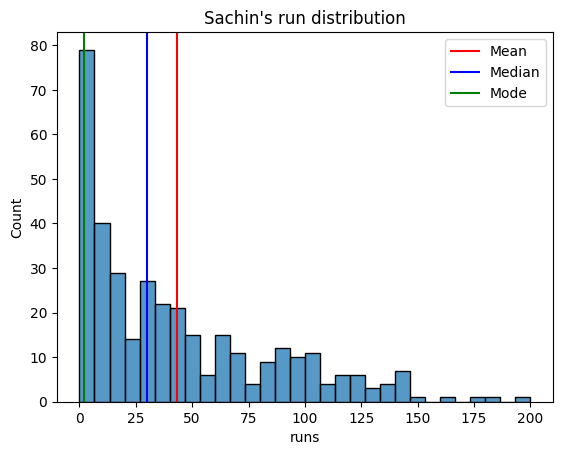

In [109]:
sns.histplot(sachin , x = sachin['runs'] , bins = 30)
mode = sachin['runs'].mode()
mean = sachin['runs'].mean()
median = sachin['runs'].median()
plt.axvline(mean , color = 'red' , label = 'Mean')
plt.axvline(median , color = 'blue' , label = 'Median')
plt.axvline(mode[0] , color = 'green' , label = 'Mode')
plt.title("Sachin's run distribution")
plt.legend()
plt.show()

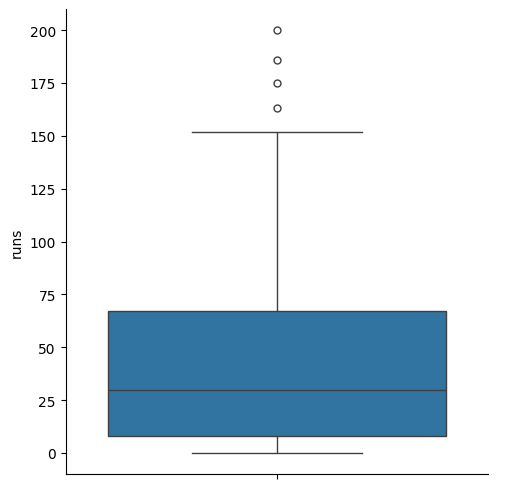

In [110]:
sns.catplot(sachin , y = sachin['runs'] , kind = 'box')